In [1]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme/SCFR


In [37]:
from data_structures.trees import *
from utilities.drawing import draw_tree
from data_structures.cfr_trees import CFRTree, CFRJointStrategy, CFRNode
from cfr_code.reconstruction_cfr import SolveWithReconstructionCFR
from cfr_code.sample_cfr import SolveWithSampleCFR
from cfr_code.cfr import SolveWithCFR
import ast
from utilities.graphs import epsilon_graph, comparative_epsilon_graph

In [3]:
%load_ext autoreload
%autoreload 2

# Coordination game

In [97]:
coordination_tree = Tree()

In [98]:
n1 = coordination_tree.addNode(1, 1, coordination_tree.root)
n2 = coordination_tree.addNode(1, 1, coordination_tree.root)

In [99]:
coordination_tree.addLeaf(n1, [1, 1])
coordination_tree.addLeaf(n1, [0, 0])
coordination_tree.addLeaf(n2, [0, 0])
coordination_tree.addLeaf(n2, [1, 1])

Leaf6 (children of Node2 via Action 1.1) -  utility is [1, 1]

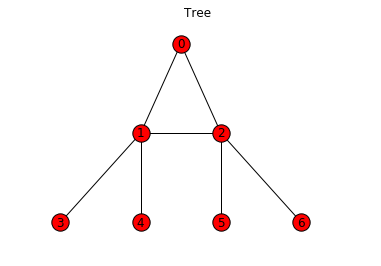

In [100]:
draw_tree(coordination_tree)

In [101]:
coord_res = []
ct = CFRTree(coordination_tree)
coord_res.append(SolveWithReconstructionCFR(ct, iterations = 100, reconstructEveryIteration = 1,
                                 reconstructWithOptimalPlan = False, checkEveryIteration = 1))
ct = CFRTree(coordination_tree)
coord_res.append(SolveWithSampleCFR(ct, iterations = 100, checkEveryIteration = 1))
ct = CFRTree(coordination_tree)
coord_res.append(SolveWithCFR(ct, iterations = 100, checkEveryIteration = 1))

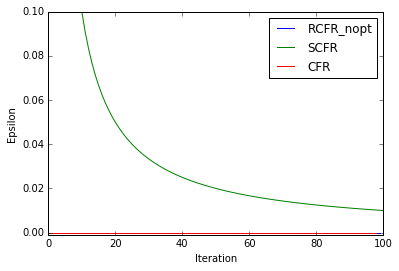

In [136]:
comparative_epsilon_graph(coord_res, legend = ['RCFR_nopt', 'SCFR', 'CFR'], ylims = (-0.001, 0.1))

# Permutation game

In [151]:
permutation_tree = Tree(3)

In [152]:
n1 = permutation_tree.addNode(1, 1, permutation_tree.root)
n2 = permutation_tree.addNode(2, 2, n1)
n3 = permutation_tree.addNode(2, 2, n1)

n4 = permutation_tree.addNode(2, 2, permutation_tree.root)
n5 = permutation_tree.addNode(1, 1, n4)
n6 = permutation_tree.addNode(1, 1, n4)

In [153]:
permutation_tree.addLeaf(n2, [-2, -2, -2])
permutation_tree.addLeaf(n2, [0, 0, 0])
permutation_tree.addLeaf(n3, [2, 2, 2])
permutation_tree.addLeaf(n3, [0, 0, 0])
permutation_tree.addLeaf(n5, [0, 0, 0])
permutation_tree.addLeaf(n5, [2, 2, 2])
permutation_tree.addLeaf(n6, [0, 0, 0])
permutation_tree.addLeaf(n6, [-2, -2, -2])

Leaf14 (children of Node6 via Action 1.1) -  utility is [-2, -2, -2]

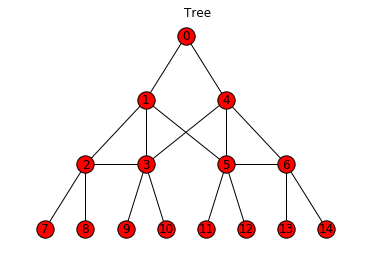

In [154]:
draw_tree(permutation_tree)

In [14]:
perm_res = []
ct = CFRTree(permutation_tree)
perm_res.append(SolveWithReconstructionCFR(ct, iterations = 100, reconstructEveryIteration = 1,
                                 reconstructWithOptimalPlan = False, checkEveryIteration = 1))
ct = CFRTree(permutation_tree)
perm_res.append(SolveWithSampleCFR(ct, iterations = 100, checkEveryIteration = 1))
ct = CFRTree(permutation_tree)
perm_res.append(SolveWithCFR(ct, iterations = 100, checkEveryIteration = 1))

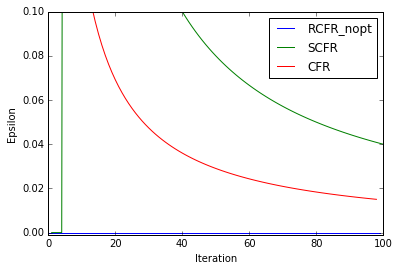

In [15]:
comparative_epsilon_graph(perm_res, legend = ['RCFR_nopt', 'SCFR', 'CFR'], ylims = (-0.001, 0.1))

In [4]:
from games.permutation import *

In [82]:
#big_perm_tree = build_permutation_game_tree(4, 3, utility_params = [[1, -2, 3], [-4, 5, -6], [7, -8, 9]])

big_perm_tree = build_permutation_game_tree(5, 3, utility_params = [[-5, 5, 4], [2, -5, 3], [1, 2, -5]])

# [BOH] big_perm_tree = build_permutation_game_tree(4, 3, utility_params = [[-1, 1, 0], [0, -1, 1], [1, 0, -1]])

In [83]:
print("Size = " + str(big_perm_tree.node_count) + " nodes")

Size = 43766 nodes


In [84]:
big_perm_res = []
print("--------------- RCFR ---------------")
ct = CFRTree(big_perm_tree)
big_perm_res.append(SolveWithReconstructionCFR(ct, iterations = 1500, reconstructEveryIteration = 5,
                                 reconstructWithOptimalPlan = False, checkEveryIteration = 5,
                                 show_perc = True))
print("--------------- SCFR ---------------")
ct = CFRTree(big_perm_tree)
big_perm_res.append(SolveWithSampleCFR(ct, iterations = 2500, checkEveryIteration = 5, show_perc = True))
print("--------------- CFR ---------------")
ct = CFRTree(big_perm_tree)
big_perm_res.append(SolveWithCFR(ct, iterations = 2000, checkEveryIteration = 5, show_perc = True))

--------------- RCFR ---------------
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
--------------- SCFR ---------------
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
--------------- CFR ---------------
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


In [86]:
leaves = set()
CFRTree(big_perm_tree).root.find_terminals(leaves)
min_u = min(leaves, key = lambda n: n.utility[0]).utility[0]
max_u = max(leaves, key = lambda n: n.utility[0]).utility[0]
delta_utility = max_u - min_u

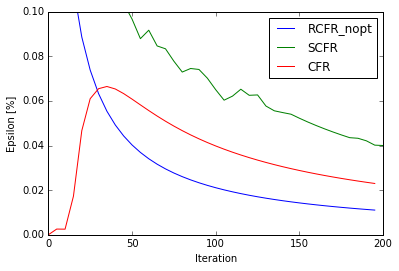

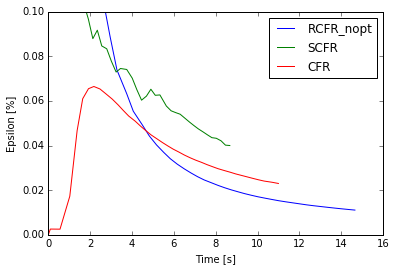

In [166]:
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.1))
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.1), xaxis = 'time')

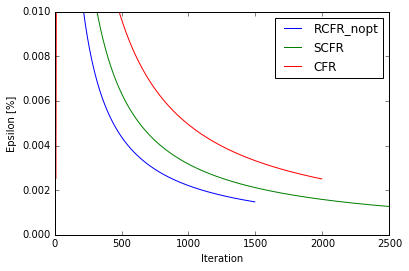

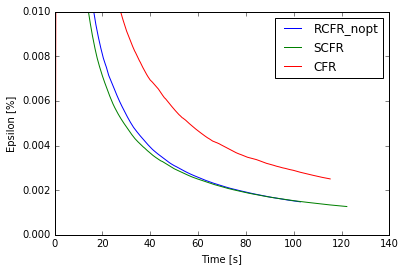

In [175]:
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.01))
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.01), xaxis = 'time')

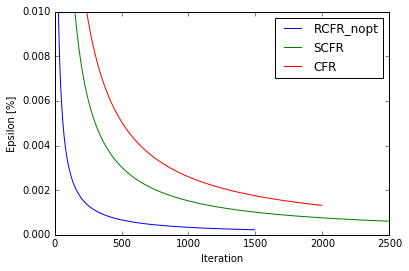

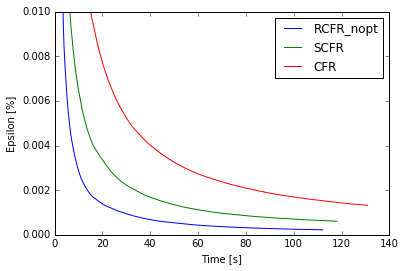

In [180]:
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.01))
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.01), xaxis = 'time')

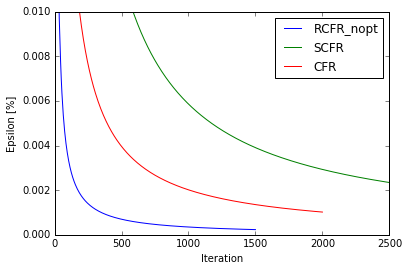

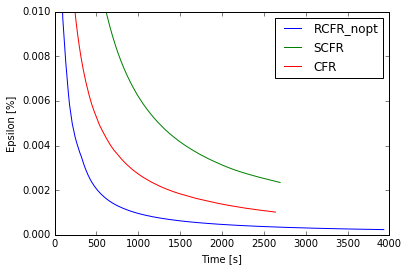

In [87]:
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.01))
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.01), xaxis = 'time')